# Precipitazioni_new
[torna all'indice](#Indice)

**Principi generali:**  

si guarda alla PDF data dalla funzione $\Gamma$ (anche generalizzata per migliorare il fit)


**pseudocode**  
apro i dataset  R20, RX1DAY  
apro il dataset del periodo di riferimento per R20 e RX1DAY  
calcolo $\mu$ e $\theta$  
il valore è dato da:
- aumento del valore R20 (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?
- aumento del valore R1XDAY (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?

Calcolo statistiche pr: devo considerare la statistica di precipitazione sull'intero periodo. Per la precipitazione giornaliera calcolo tutto, per la precipitazione intensa (R20) filtro sui giorni con almeno 20mm.  
La procedura è la stessa, i file sono gli stessi, cambiano i 2 periodi.  
Considero 4.5 e 8.5 o uno solo? Prima dovrei vedere qual è la situazione peggiore...

$$
f(x; k, \theta) = \frac{1}{\theta^k \cdot \Gamma(a)} \cdot x ^{k - 1} \cdot e^\left(-\frac{x}{\theta}\right)
$$

where:

- x is the daily precipitation (x>0)
- k is the shape parameter
- $\theta$ is the scale parameter
- $\Gam \leftm\rightot ) is the Gamma function

$$
p (P) = A \cdot P ^  {-\tau _P} \cdot e ^ {- \frac{P}{P _L}}
$$

where:

$\tau{_P}$ (<1) is a power law exponent governing the rate of decay of the PDF  
P_L = $\theta$ can be regarded as a dailiy precipitation cutoff scale, where the pdf drops sharply

n

In order to improve data fitting it is possible to use a generalized gamma funcion for PDF:

$$
f(x; a, c, \theta, d) = \frac{c}{\theta^a \cdot \Gamma(a/c)} \cdot \left( {{x-d}} \right)^{a-1} \cdot \exp \left( - \left( \frac{x-d}{\theta} \right)^c \right)
$$
dove 

a: È il parametro di forma. Controlla la forma della distribuzione, influenzando la steilizzazione della coda della distribuzione.  
c: È un parametro di forma addizionale. Questo parametro offre maggiore flessibilità alla distribuzione gamma, consentendo di modellare una varietà più ampia di forme di distribuzione.  
$\theta$ : È il parametro di scala Controlla la scala della distribuzione, influenzando la larghezza della distribuzione. Valori più alti di $\theta$ corrispondono a distribuzioni più strette.  
d: è il fattore di spostamento: è influenzato nel fit dalla presenza di valori minimi di precipitazione. Nel caso di esame di precipitazioni superiori a 1mm può essere posto =1

**Caso 2021-2040**  
NB: il file dei dati è unico

carico i file delle precipitazioni con i dati giornalieri: tengo separati gli 8 modelli per avere più statistica (oppure per ccalcolare l'ensemble e poi fare il calcolo sull'ensemble)

In [2]:
# va modificato in funzione dei file che si vogliono considerare
file_indici=['./Indici_2023/PNACC_2023/ARCIS_data/ARCIS_GG_1961-2015_LOMB.nc',
                  './Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4'
                  ]

In [3]:
for f in file_indici:
    print(f)
    ds = xr.open_dataset(f)

./Indici_2023/PNACC_2023/ARCIS_data/ARCIS_GG_1961-2015_LOMB.nc
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4


10956
10956
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... Fal

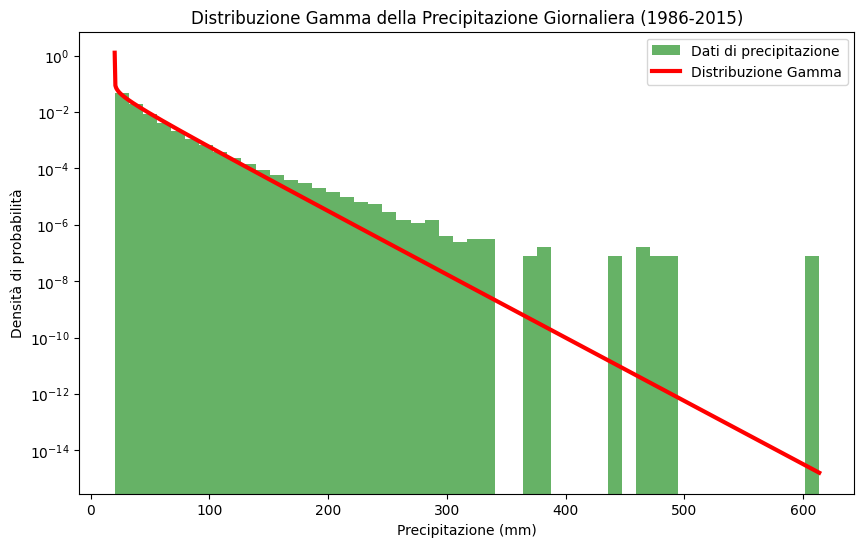

In [58]:
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable='rr'
precipitation = ds[variable]
precipitation_to_go=[]
# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Assumendo che i dati di precipitazione siano in mm/giorno
# Filtrare per i valori maggiori di zero per la distribuzione Gamma
precipitation_to_go = precipitation_filtered.values
print(len(precipitation_to_go))
precipitation_positive_nan = np.where(precipitation_to_go > 20, precipitation_to_go, np.nan)
print(len(precipitation_positive_nan))

# Trova gli indici dei valori non NaN in precipitation_positive_nan
indici_non_nan = ~np.isnan(precipitation_positive_nan)
print((indici_non_nan))
# Seleziona solo i valori non NaN utilizzando gli indici trovati
precipitation_positive = precipitation_positive_nan[indici_non_nan]
Num=np.sum(indici_non_nan)
print(Num,len(precipitation_positive))

# Calcolare i parametri della distribuzione Gamma
params_gengamma = gengamma.fit(precipitation_positive)

print(f'Generalized Gamma Fit:\nParams: {params_gengamma}')
# Plot della distribuzione
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Istogramma dei dati di precipitazione giornaliera
ax.hist(precipitation_positive, bins=50, density=True, alpha=0.6, color='g', label='Dati di precipitazione')

# Valori della distribuzione gamma
x = np.linspace(precipitation_positive.min(), precipitation_positive.max(), 1000)
pdf_fitted = gengamma.pdf(x, *params_gengamma)

# Plot della distribuzione Gamma
ax.plot(x, pdf_fitted, 'r-', lw=3, label='Distribuzione Gamma')
ax.set_title('Distribuzione Gamma della Precipitazione Giornaliera (1986-2015)')
ax.set_xlabel('Precipitazione (mm)')
ax.set_ylabel('Densità di probabilità')
ax.set_yscale('log')  # Imposta la scala y come logaritmica
ax.legend()

plt.show()

# Chiudi il dataset
ds.close()


Cella lat=0, lon=0
Cella lat=0, lon=1
Cella lat=0, lon=2
Cella lat=0, lon=3
Cella lat=0, lon=4
Cella lat=0, lon=5
  Media, varianza, N, P(80): 7.108818412871836 120.31138850970049 2538 0.0015626789360524418


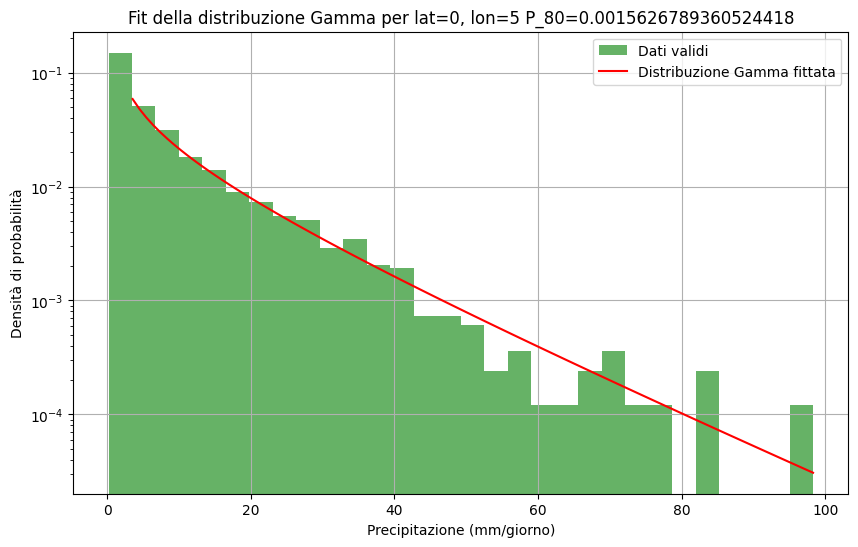

Cella lat=0, lon=6
Cella lat=0, lon=7
Cella lat=0, lon=8
Cella lat=0, lon=9
Cella lat=0, lon=10
Cella lat=0, lon=11
Cella lat=0, lon=12
Cella lat=0, lon=13
Cella lat=0, lon=14
Cella lat=0, lon=15
Cella lat=0, lon=16
Cella lat=0, lon=17
Cella lat=0, lon=18
Cella lat=0, lon=19
Cella lat=0, lon=20
Cella lat=0, lon=21
Cella lat=0, lon=22
Cella lat=0, lon=23
Cella lat=0, lon=24
Cella lat=0, lon=25
Cella lat=0, lon=26
Cella lat=0, lon=27
Cella lat=0, lon=28
Cella lat=0, lon=29
Cella lat=0, lon=30
Cella lat=0, lon=31
Cella lat=0, lon=32
Cella lat=0, lon=33
Cella lat=0, lon=34
Cella lat=0, lon=35
Cella lat=0, lon=36
Cella lat=0, lon=37
Cella lat=0, lon=38
Cella lat=0, lon=39
Cella lat=0, lon=40
Cella lat=0, lon=41
Cella lat=0, lon=42
Cella lat=0, lon=43
Cella lat=0, lon=44
Cella lat=0, lon=45
  Media, varianza, N, P(80): 5.430959002187623 42.592475400959955 3227 1.3864878026570437e-05


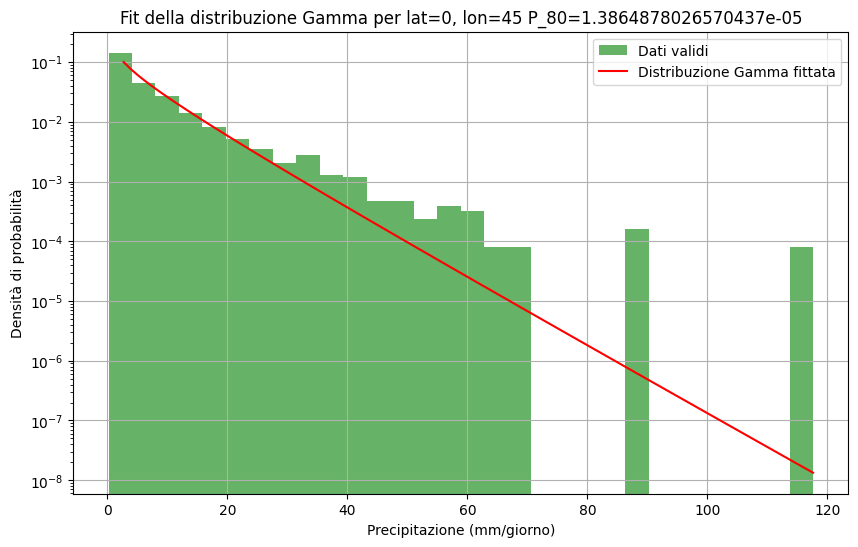

Cella lat=0, lon=46
Cella lat=0, lon=47
Cella lat=0, lon=48
Cella lat=0, lon=49
  Media, varianza, N, P(80): 4.44088158327175 45.22192126528695 3142 5.719673527693203e-05


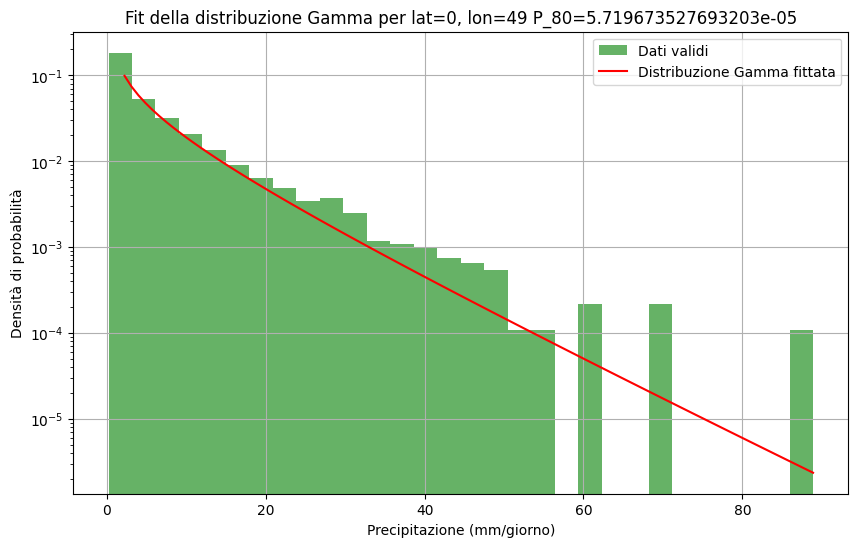

Cella lat=0, lon=50
Cella lat=0, lon=51
Cella lat=0, lon=52
Cella lat=0, lon=53
Cella lat=0, lon=54
Cella lat=0, lon=55
Cella lat=0, lon=56
Cella lat=0, lon=57
Cella lat=0, lon=58
Cella lat=1, lon=0
Cella lat=1, lon=1
Cella lat=1, lon=2
Cella lat=1, lon=3
Cella lat=1, lon=4
  Media, varianza, N, P(80): 6.796653018239508 86.91599345022783 2388 0.0004642787658694081


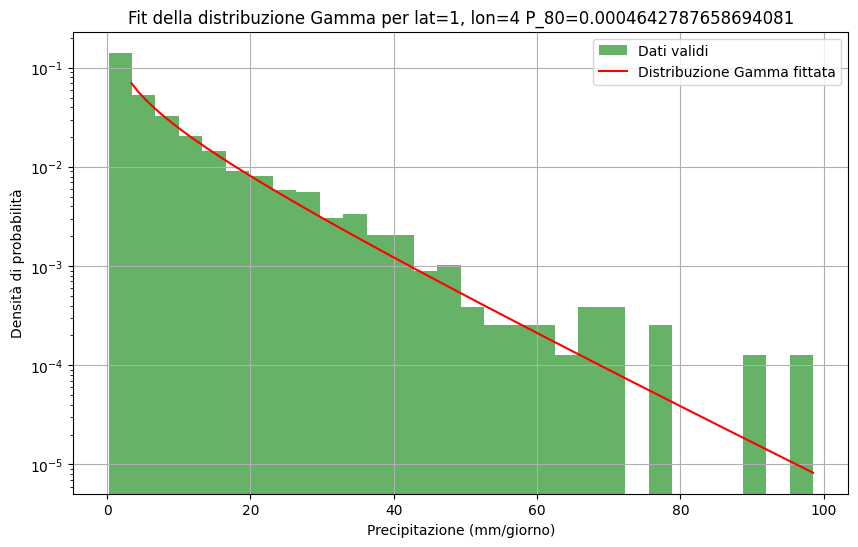

Cella lat=1, lon=5
Cella lat=1, lon=6
Cella lat=1, lon=7
Cella lat=1, lon=8
Cella lat=1, lon=9
Cella lat=1, lon=10
Cella lat=1, lon=11
Cella lat=1, lon=12
Cella lat=1, lon=13
Cella lat=1, lon=14
Cella lat=1, lon=15
Cella lat=1, lon=16
Cella lat=1, lon=17
Cella lat=1, lon=18
Cella lat=1, lon=19
Cella lat=1, lon=20
Cella lat=1, lon=21
Cella lat=1, lon=22
Cella lat=1, lon=23
Cella lat=1, lon=24
Cella lat=1, lon=25
Cella lat=1, lon=26
Cella lat=1, lon=27
Cella lat=1, lon=28
Cella lat=1, lon=29
Cella lat=1, lon=30
Cella lat=1, lon=31
Cella lat=1, lon=32
Cella lat=1, lon=33
Cella lat=1, lon=34
Cella lat=1, lon=35
Cella lat=1, lon=36
Cella lat=1, lon=37
Cella lat=1, lon=38
Cella lat=1, lon=39
Cella lat=1, lon=40
Cella lat=1, lon=41
Cella lat=1, lon=42
Cella lat=1, lon=43
Cella lat=1, lon=44
Cella lat=1, lon=45
Cella lat=1, lon=46
Cella lat=1, lon=47
  Media, varianza, N, P(80): 5.882330557187867 71.50694588493381 3163 0.0002725522855030471


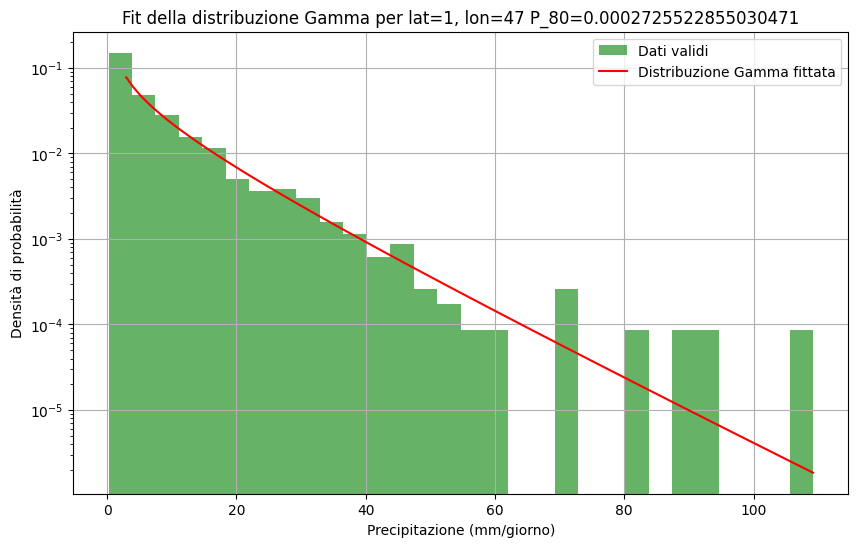

Cella lat=1, lon=48
Cella lat=1, lon=49
Cella lat=1, lon=50
Cella lat=1, lon=51
Cella lat=1, lon=52
Cella lat=1, lon=53
Cella lat=1, lon=54
Cella lat=1, lon=55
Cella lat=1, lon=56
  Media, varianza, N, P(80): 6.263753865087079 59.67142598014865 3496 7.8196795029295e-05


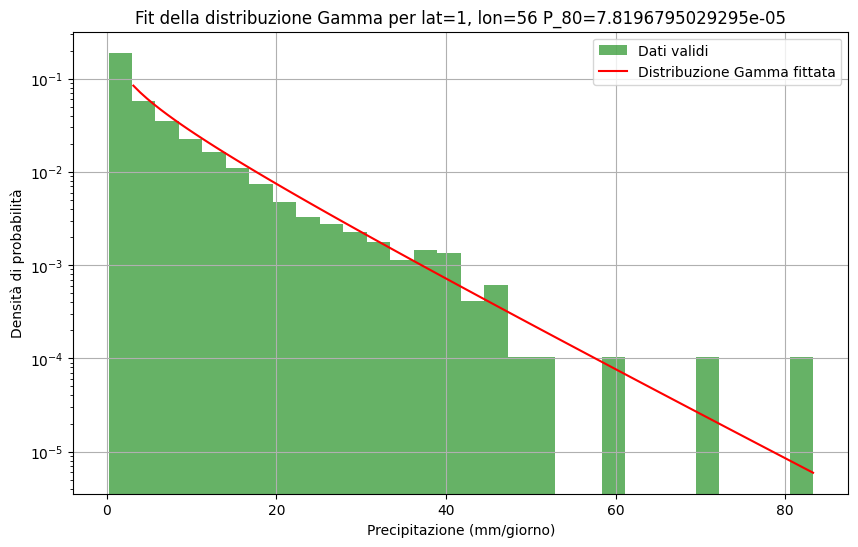

Cella lat=1, lon=57
Cella lat=1, lon=58
Cella lat=2, lon=0
Cella lat=2, lon=1
Cella lat=2, lon=2
Cella lat=2, lon=3
Cella lat=2, lon=4
Cella lat=2, lon=5
Cella lat=2, lon=6
Cella lat=2, lon=7
Cella lat=2, lon=8
Cella lat=2, lon=9
Cella lat=2, lon=10
Cella lat=2, lon=11
Cella lat=2, lon=12
Cella lat=2, lon=13
Cella lat=2, lon=14
Cella lat=2, lon=15
Cella lat=2, lon=16
Cella lat=2, lon=17
Cella lat=2, lon=18
Cella lat=2, lon=19
Cella lat=2, lon=20
Cella lat=2, lon=21
Cella lat=2, lon=22
Cella lat=2, lon=23
Cella lat=2, lon=24
Cella lat=2, lon=25
  Media, varianza, N, P(80): 5.919391851463611 50.91059114489871 3875 3.436592404115757e-05


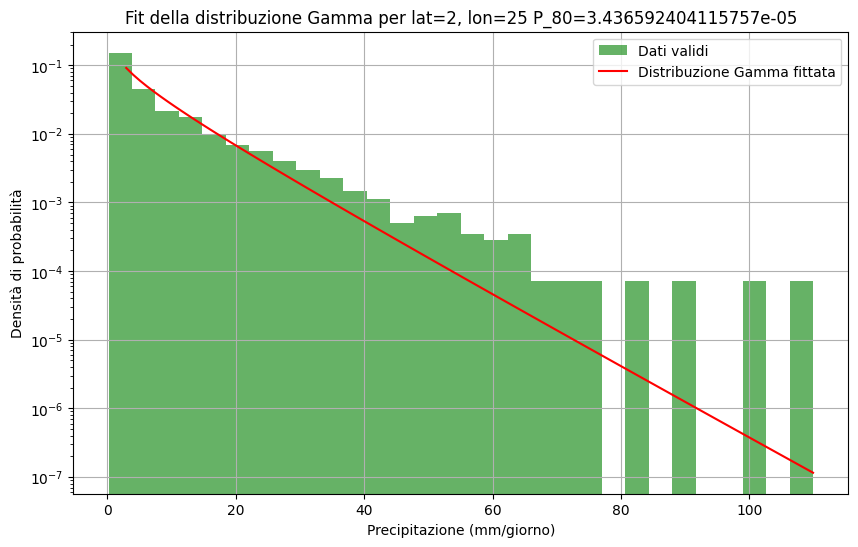

Cella lat=2, lon=26
Cella lat=2, lon=27
Cella lat=2, lon=28
Cella lat=2, lon=29
Cella lat=2, lon=30
Cella lat=2, lon=31
  Media, varianza, N, P(80): 5.390719914599864 59.57744964191777 3508 0.00013756292928202019


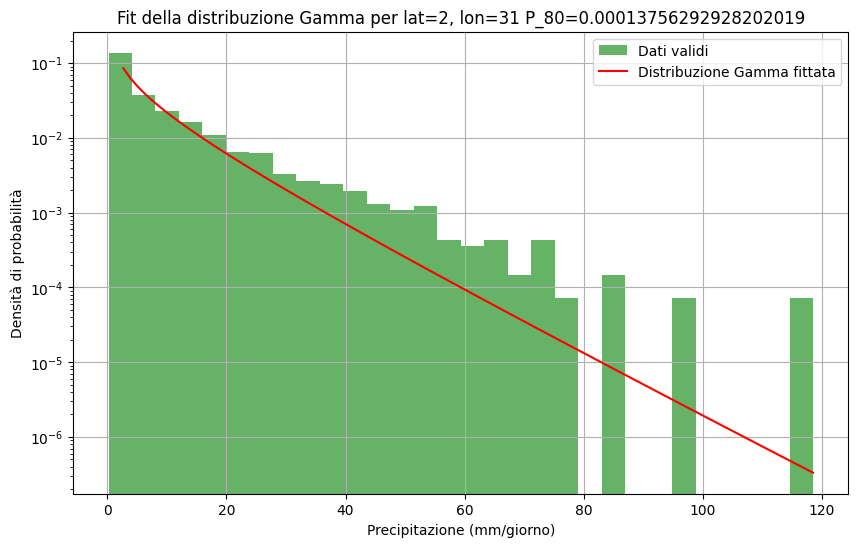

Cella lat=2, lon=32
Cella lat=2, lon=33
Cella lat=2, lon=34
Cella lat=2, lon=35
Cella lat=2, lon=36
Cella lat=2, lon=37
Cella lat=2, lon=38
Cella lat=2, lon=39
  Media, varianza, N, P(80): 5.460903107397249 65.2579760051274 3203 0.00021599470800226506


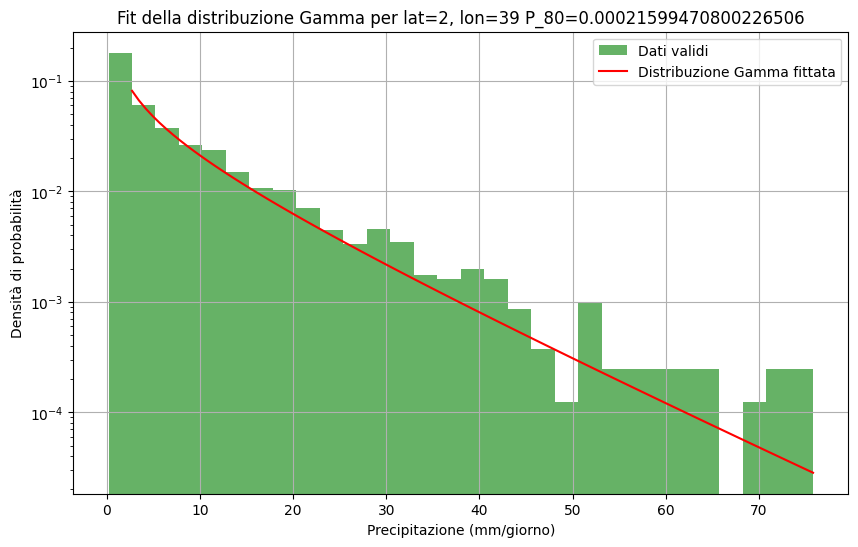

Cella lat=2, lon=40
  Media, varianza, N, P(80): 5.348309645925477 62.46753148921393 3394 0.0001837707201723937


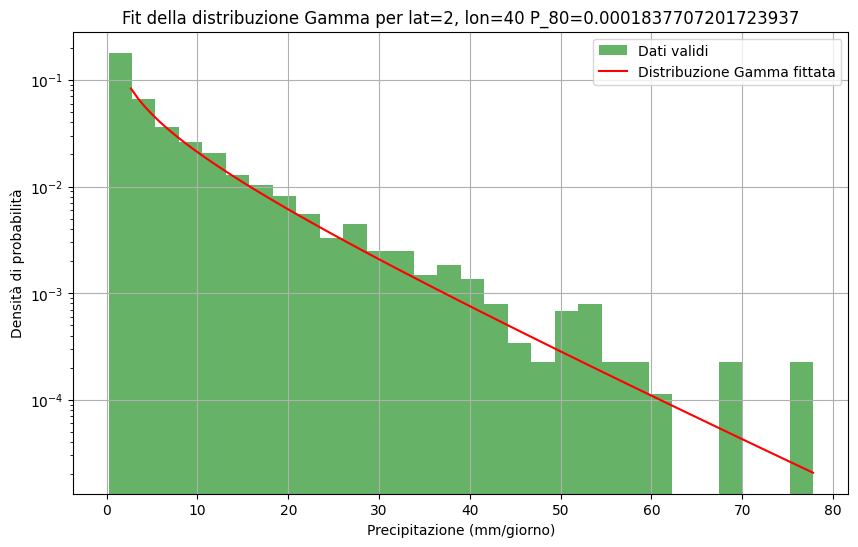

Cella lat=2, lon=41
Cella lat=2, lon=42
Cella lat=2, lon=43
Cella lat=2, lon=44
Cella lat=2, lon=45
Cella lat=2, lon=46
Cella lat=2, lon=47
Cella lat=2, lon=48
Cella lat=2, lon=49
Cella lat=2, lon=50
Cella lat=2, lon=51
  Media, varianza, N, P(80): 4.533517831282707 41.03774357910189 3148 2.6907679229637438e-05


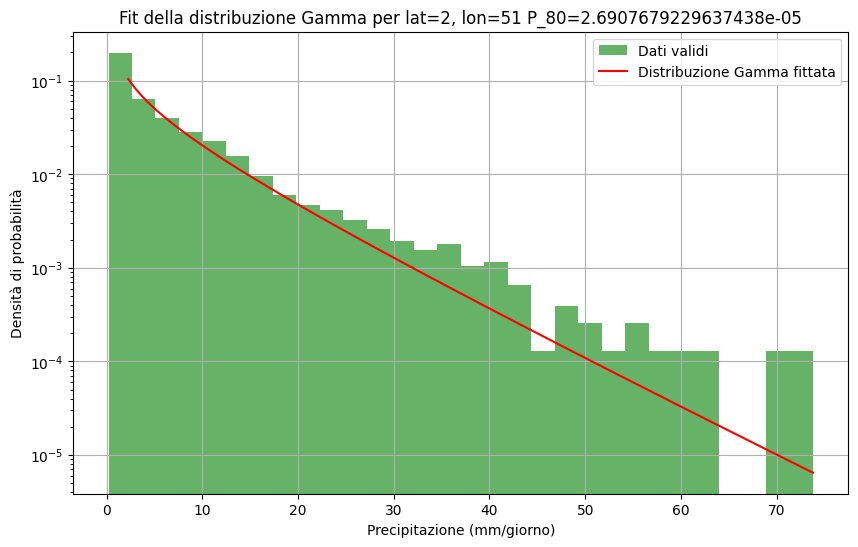

Cella lat=2, lon=52
Cella lat=2, lon=53
Cella lat=2, lon=54
Cella lat=2, lon=55
  Media, varianza, N, P(80): 4.338770280287658 51.10027539528218 3551 0.00013035914868153586


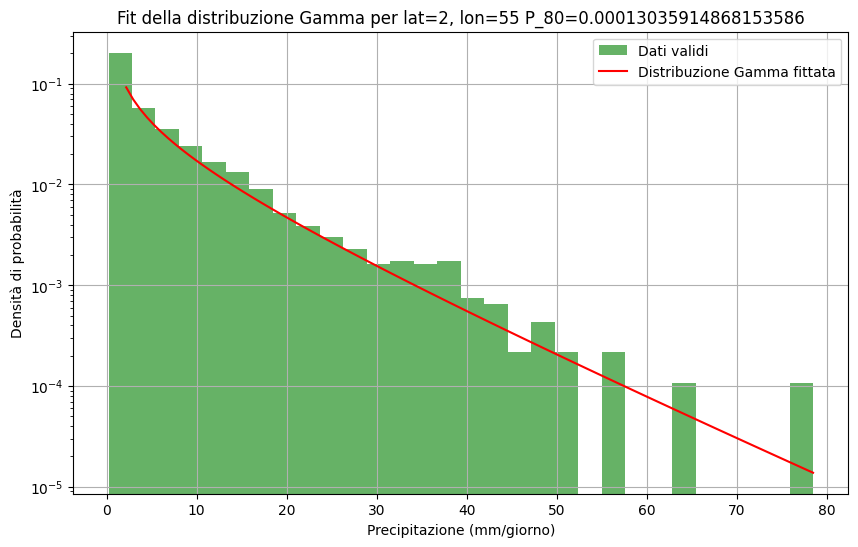

Cella lat=2, lon=56
  Media, varianza, N, P(80): 6.336162106377453 109.24146008798864 3400 0.0013712484641706935


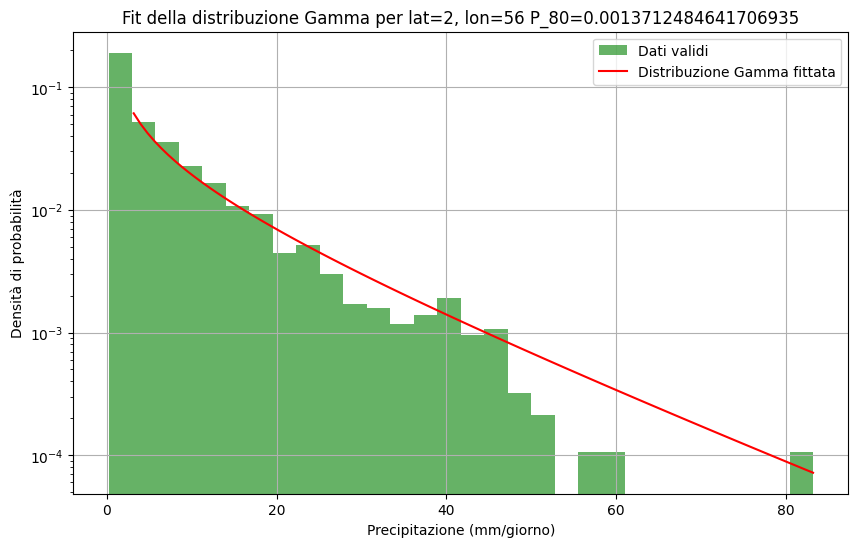

Cella lat=2, lon=57
  Media, varianza, N, P(80): 4.761922133189166 54.662847138479236 3386 0.00013392588625704693


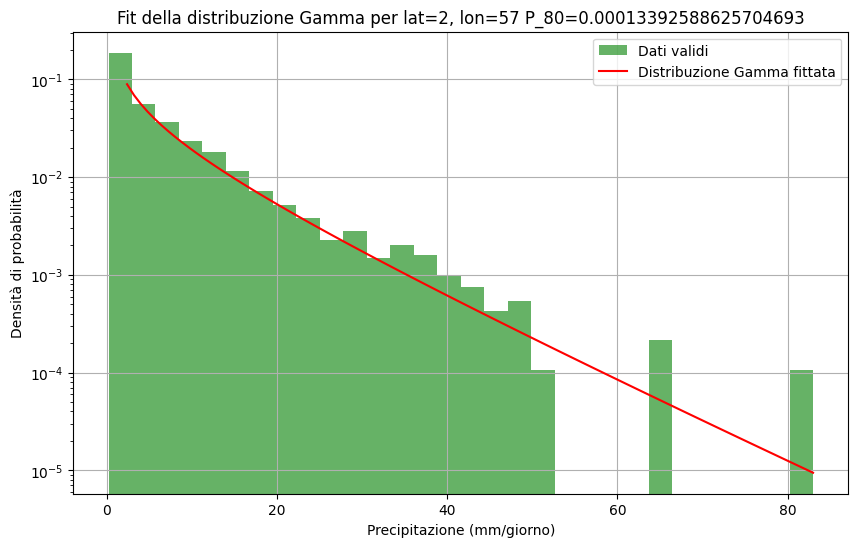

Cella lat=2, lon=58
  Media, varianza, N, P(80): 12.191766969502071 584.2214026564235 3448 0.02736421597128913


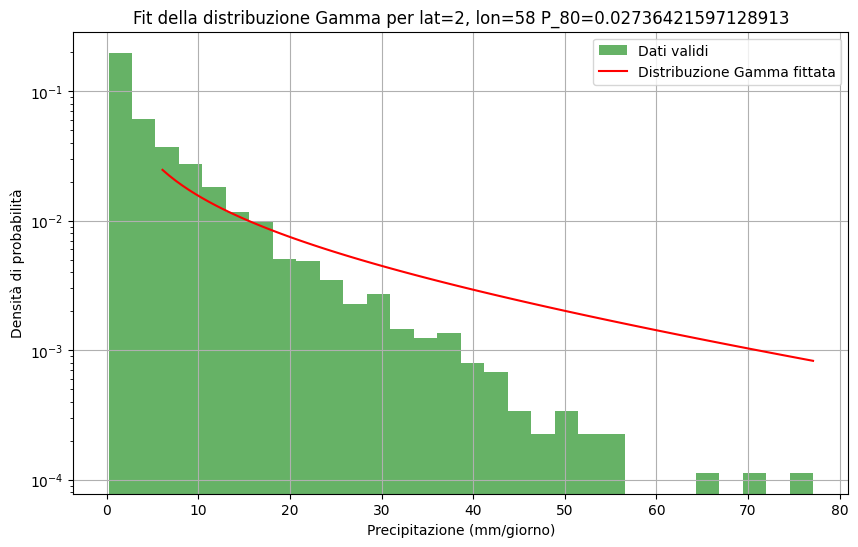

Cella lat=3, lon=0
Cella lat=3, lon=1
  Media, varianza, N, P(80): 5.878348832724904 43.41210801549944 2692 1.04974740731123e-05


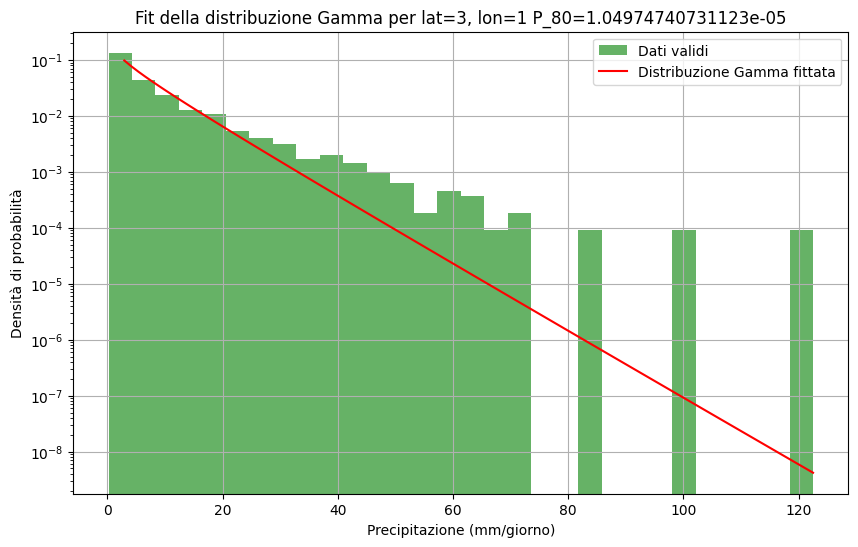

Cella lat=3, lon=2
Cella lat=3, lon=3
  Media, varianza, N, P(80): 6.437137584548268 83.0623556499859 2561 0.0004346663141102658


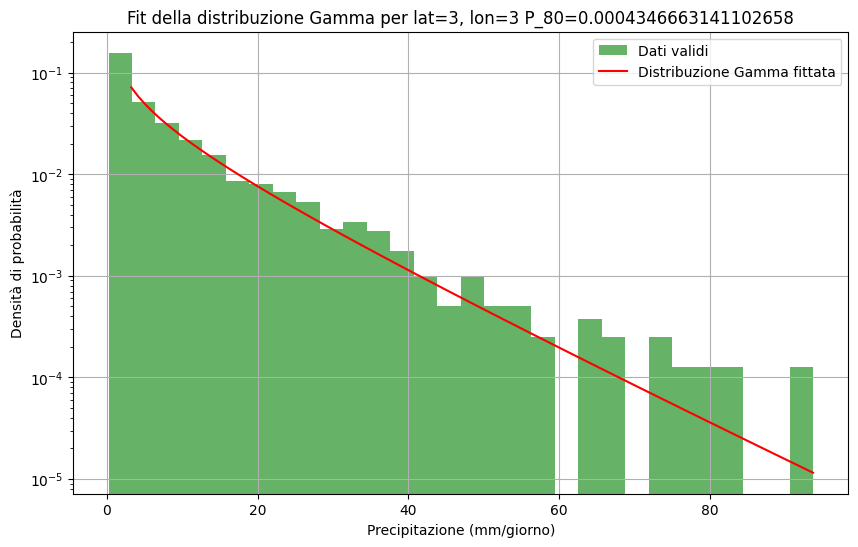

Cella lat=3, lon=4
  Media, varianza, N, P(80): 6.011808342999254 73.65502728827836 2561 0.0002958823889331885


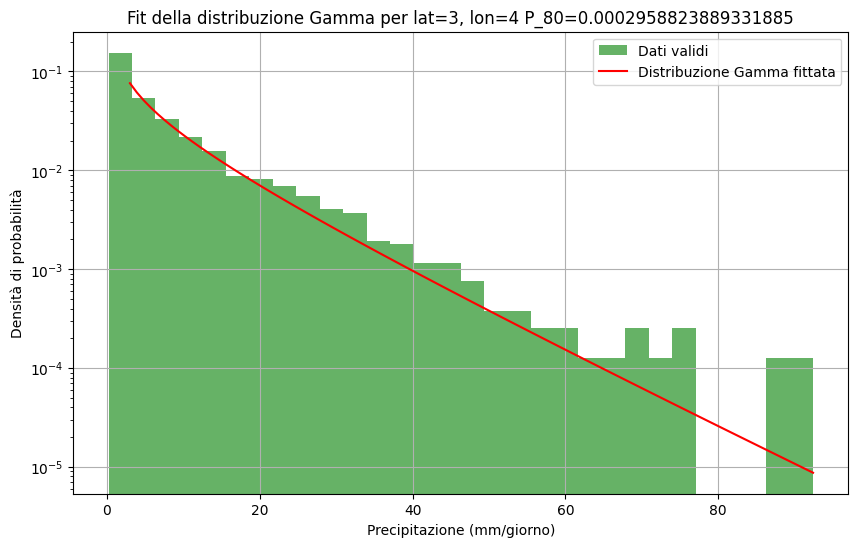

Cella lat=3, lon=5
  Media, varianza, N, P(80): 9.07612200161948 197.0833781958829 2583 0.004954008441112379


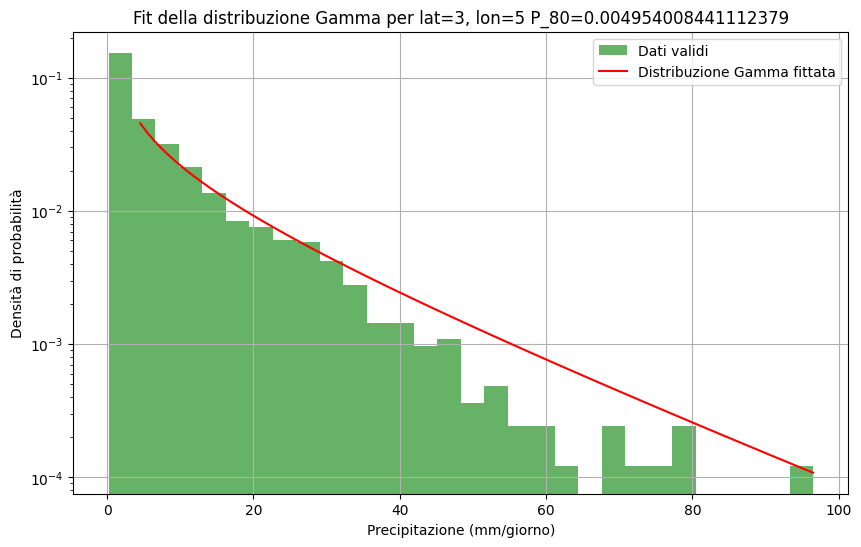

Cella lat=3, lon=6
  Media, varianza, N, P(80): 5.975024755865513 69.61994559014616 2627 0.00022596770278704437


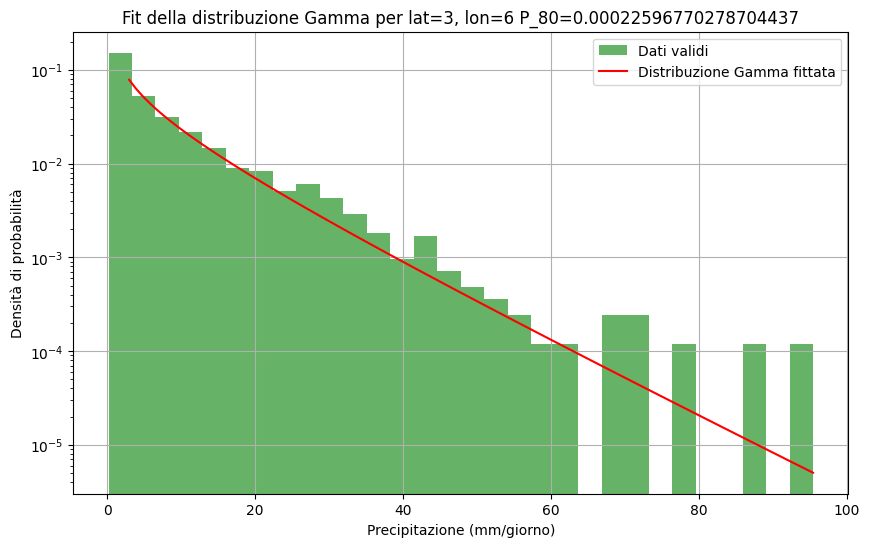

Cella lat=3, lon=7
Cella lat=3, lon=8
Cella lat=3, lon=9
Cella lat=3, lon=10
Cella lat=3, lon=11
Cella lat=3, lon=12
Cella lat=3, lon=13
Cella lat=3, lon=14
Cella lat=3, lon=15
Cella lat=3, lon=16
Cella lat=3, lon=17
Cella lat=3, lon=18
Cella lat=3, lon=19
Cella lat=3, lon=20
Cella lat=3, lon=21
Cella lat=3, lon=22
  Media, varianza, N, P(80): 5.3688957937377 41.0412465464914 3659 1.0959573071289697e-05


KeyboardInterrupt: 

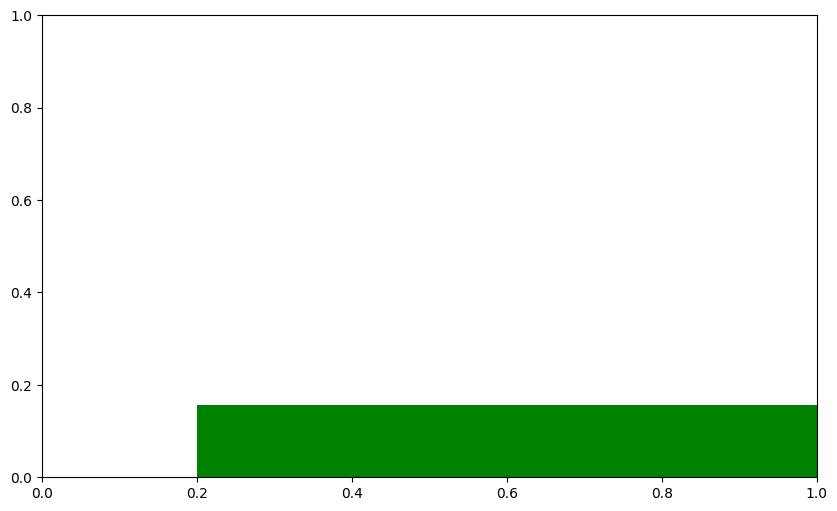

In [93]:
import xarray as xr
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable = 'rr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Numero di celle latitudine-longitudine
num_lat = len(precipitation_filtered['lat'])
num_lon = len(precipitation_filtered['lon'])

# Definisci una funzione per calcolare media e varianza
def calcola_media_varianza_gamma(params_gamma):
    k = params_gamma[0]  # shape parameter
    loc = params_gamma[1]  # location parameter
    theta = params_gamma[2]  # scale parameter
    
    mean = k * theta
    variance = k * (theta ** 2)
    
    return mean, variance

# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict = {}

# Per ciascuna cella latitudine-longitudine
for lat in range(num_lat):
    for lon in range(num_lon):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered[:, lat, lon]
        
        # Rimuovi i valori NaN e quelli inferiori a zero
        dati_validi = dati_cell[~np.isnan(dati_cell) & (dati_cell > 0.1)]
        num_elements=len(dati_validi)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Gamma
        try:
            parametri_fit = gamma.fit(dati_validi)
            
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gamma(parametri_fit)
            
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            parametri_fit_dict[(lat, lon)] = {
                'lat': float(precipitation_filtered['lat'][lat].values),
                'lon': float(precipitation_filtered['lon'][lon].values),
                'mean': mean,
                'variance': variance,
                'num_elements': len(dati_validi)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per la cella lat={lat}, lon={lon}: {e}")
            continue
        print(f"Cella lat={lat}, lon={lon}")
        P_80=1-gamma.cdf(80,*parametri_fit)
        if P_80 > 1e-5:
            print(f"  Media, varianza, N, P(80): {mean} {variance} {num_elements} {P_80}") 
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(mean/2, max(dati_validi), 100)
            pdf_fitted = gamma.pdf(x, *parametri_fit)
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Gamma fittata')
            
            plt.title(f'Fit della distribuzione Gamma per lat={lat}, lon={lon} P_80={P_80}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()


# ciclo corretto per dati storici  
**ATTENZIONE!** viene salvato tutto in un dictionary

In [136]:
#gengamma
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable = 'rr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Numero di celle latitudine-longitudine
num_lat = len(precipitation_filtered['lat'])
num_lon = len(precipitation_filtered['lon'])

# Definisci una funzione per calcolare media e varianza
def calcola_media_varianza_gengamma(params_gengamma):
    a = params_gengamma[0]
    c = params_gengamma[1]
    loc = params_gengamma[2]
    scale = params_gengamma[3]
    
    mean = loc + scale * (a / c)
    variance = scale**2 * (a / c**2)
    
    return mean, variance

# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict = {}

# Per ciascuna cella latitudine-longitudine
for lat in range(num_lat):
    for lon in range(num_lon):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered[:, lat, lon]
        
        # Rimuovi i valori NaN e quelli inferiori a zero
        dati_validi = dati_cell[~np.isnan(dati_cell) & (dati_cell > 0.1)]
        num_elements=len(dati_validi)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            parametri_fit = gengamma.fit(dati_validi)
            
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gengamma(parametri_fit)
            
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            parametri_fit_dict[(lat, lon)] = {
                'lat': float(precipitation_filtered['lat'][lat].values),
                'lon': float(precipitation_filtered['lon'][lon].values),
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'variance': variance,
                'num_elements': len(dati_validi)/len(dati_cell)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per la cella lat={lat}, lon={lon}: {e}")
            continue
        print(f"Cella lat={lat}, lon={lon}")
        P_80=1-gengamma.cdf(80,*parametri_fit)
        percentuale_sup_80 = (dati_validi > 80).sum() / len(dati_validi) 
        if P_80 > 1e-3:
            print(f"  Media, varianza, N, P(80): {mean} {variance} {num_elements} {P_80}") 
            """
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(mean/2, max(dati_validi), 100)
            pdf_fitted = gengamma.pdf(x, *parametri_fit)
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Generalized Gamma fittata')
            
            plt.title(f'Fit della distribuzione Generalized Gamma per lat={lat}, lon={lon} P_80={P_80:.4f} {percentuale_sup_80:.4f}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()
            """

Cella lat=0, lon=0
  Media, varianza, N, P(80): 9.349273202447538 120.12768324021563 2476 0.0030708043336236113
Cella lat=0, lon=1
  Media, varianza, N, P(80): 3.7155767082966147 5.732911183508984 2501 0.015562631822062523
Cella lat=0, lon=2
  Media, varianza, N, P(80): 6.206721735072079 22.979149236343353 2360 0.024437749814146814
Cella lat=0, lon=3
  Media, varianza, N, P(80): 2.149790327934029 1.6761957487610342 2512 0.030647924451902453
Cella lat=0, lon=4
Cella lat=0, lon=5
  Media, varianza, N, P(80): 7.9929266018870715 113.05238061062482 2538 0.0018143388266851357
Cella lat=0, lon=6
  Media, varianza, N, P(80): 8.158862012868823 114.47929834596418 2739 0.0026686069011825353
Cella lat=0, lon=7
  Media, varianza, N, P(80): 7.08854993093251 35.43630960350503 2694 0.013609688134809561
Cella lat=0, lon=8
  Media, varianza, N, P(80): 3.5067979951254395 5.594950752394536 2748 0.022460026406980416
Cella lat=0, lon=9
  Media, varianza, N, P(80): 3.9038780724859983 7.039785004774079 2594 0

In [68]:
print(ds)

<xarray.Dataset>
Dimensions:  (time: 20088, lon: 59, lat: 45)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01T08:00:00 ... 2015-12-31T08:00:00
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
Data variables:
    rr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.4
    history:      Tue Feb 01 12:51:29 2022: cdo sellonlatbox,7.84,11.5,44.65,...
    institution:  ArCIS - Archivio Climatologico per l'Italia Settentionale
    References:   Pavan et al. 2018 - High resolution climate precipitation a...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


In [39]:
print(gengamma.pdf(600, *params_gengamma))

3.9635633978158847e-07


In [ ]:
T=1/(1-p)

In [103]:
for key, value in parametri_fit_dict.items():
    print(f"Cella lat={value['lat']}, lon={value['lon']}")
    P_80=1-gengamma.cdf(80,value['a'],value['c'],value['loc'],value['scale'])
    TR=1/(P_80*value['num_elements'])
    if TR<100:
        print(f"  Media, Varianza, N: {value['mean']} {value['variance']} {value['num_elements']} {TR}")

Cella lat=44.655, lon=7.841
Cella lat=44.655, lon=7.90405
Cella lat=44.655, lon=7.9671
Cella lat=44.655, lon=8.03015
Cella lat=44.655, lon=8.0932
Cella lat=44.655, lon=8.15625
Cella lat=44.655, lon=8.2193
Cella lat=44.655, lon=8.282350000000001
Cella lat=44.655, lon=8.3454
Cella lat=44.655, lon=8.40845
Cella lat=44.655, lon=8.4715
Cella lat=44.655, lon=8.53455
Cella lat=44.655, lon=8.5976
Cella lat=44.655, lon=8.66065
Cella lat=44.655, lon=8.723700000000001
Cella lat=44.655, lon=8.786750000000001
Cella lat=44.655, lon=8.8498
Cella lat=44.655, lon=8.91285
Cella lat=44.655, lon=8.9759
  Media, Varianza, N: 4.8781416113616745 13.14979807894197 0.3350675428988682 74.80002205711476
Cella lat=44.655, lon=9.03895
  Media, Varianza, N: 12.498467943983648 99.26753268704921 0.30074844833880976 60.57228891815185
Cella lat=44.655, lon=9.102
Cella lat=44.655, lon=9.16505
  Media, Varianza, N: 11.290157890606558 100.75308598839496 0.3861810879883169 89.23787864745648
Cella lat=44.655, lon=9.22810000

$$  
TR = \frac{1}{{P_{80} \times PERC}}
$$
$$
f(x; a, c, \theta, d) = \frac{c}{\theta^a \cdot \Gamma(a/c)} \cdot \left( {{x-d}} \right)^{a-1} \cdot \exp \left( - \left( \frac{x-d}{\theta} \right)^c \right)
$$
dove 

a: È il parametro di forma. Controlla la forma della distribuzione, influenzando la steilizzazione della coda della distribuzione.  
c: È un parametro di forma addizionale. Questo parametro offre maggiore flessibilità alla distribuzione gamma, consentendo di modellare una varietà più ampia di forme di distribuzione.  
$\theta$ : È il parametro di scala Controlla la scala della distribuzione, influenzando la larghezza della distribuzione. Valori più alti di $\theta$ corrispondono a distribuzioni più strette.  
d: è il fattore di spostamento: è influenzato nel fit dalla presenza di valori minimi di precipitazione. Nel caso di esame di precipitazioni superiori a 1mm può essere posto =1

**caso proiezioni**

In [4]:
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
datasets=[]
for f in file_indici[1:]:
    print(f)
    datasets.append(f)
ds = xr.open_mfdataset(datasets, combine='nested', concat_dim='realization')
print('Dataset completo')


# Assumendo che i dati di precipitazione siano in una variabile chiamata 'rr'
variable = 'pr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '2021-01-01') & (dates <= '2040-12-31')
precipitation_filtered = precipitation.sel(time=mask)
print(precipitation_filtered)
# Ottieni i valori di latitudine e longitudine
lat_values = precipitation_filtered['lat'].values
lon_values = precipitation_filtered['lon'].values

# Definisci una funzione per calcolare media e varianza della Generalized Gamma
def calcola_media_varianza_gengamma(params_gengamma):
    a = params_gengamma[0]
    c = params_gengamma[1]
    loc = params_gengamma[2]
    scale = params_gengamma[3]

    mean = loc + scale * (a / (1 - c))
    variance = scale ** 2 * (a / (1 - c) ** 2)

    return mean, variance

./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
Dataset completo
<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45

In [5]:


# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict_proj = {}
print('Inizio ciclo')
# Per ciascuna cella latitudine-longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index).compute()  # Aggiungi .compute()
        
        # Filtra i valori non NaN e > 0 usando NumPy
        filtered_data = dati_cell.where(dati_cell > 0, drop=True).values
        
        # Ottieni i valori come un array numpy e rimuovi le dimensioni non necessarie
        filtered_values = filtered_data.flatten()
        # Rimuovi i valori non finiti (NaN o infiniti)
        filtered_values = filtered_values[np.isfinite(filtered_values)]
        # Conta i valori non NaN e >0
        num_elements = len(filtered_values)
        print(lat_index, lon_index, num_elements)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            print('<30')
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            print('Elaborazione fit...')
            parametri_fit = gengamma.fit(filtered_values)
          
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gengamma(parametri_fit)
            #print(parametri_fit)
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            
            parametri_fit_dict_proj[f"{lat_index},{lon_index}"] = {
               'lat': float(precipitation_filtered['lat'][lat_index].values),
                'lon': float(precipitation_filtered['lon'][lon_index].values),
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'variance': variance,
                'num_elements': num_elements / dati_cell.size
            }
            print(parametri_fit_dict_proj[f"{lat_index},{lon_index}"])
        
        except Exception as e:
            print(f"Errore nel fit dei dati per {num_elements}: {e}")
            continue
        
        P_80 = 1 - gengamma.cdf(80, *parametri_fit)
        perc = num_elements / len(dati_cell) * 100
        
        if P_80 > 1e-5:
            print(f"Cella lat={lat_index}, lon={lon_index}")
            print(f"  Media, varianza, N, P(80): {mean:.4f}, {variance:.4f}, {num_elements}, {P_80:.4f}")
            # Plot dei grafici
            """
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(min(dati_validi), max(dati_validi), 100)
            pdf_fitted = gengamma.pdf(x, *parametri_fit)
          
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Generalized Gamma fittata')
            
            plt.title(f'Fit della distribuzione Generalized Gamma per lat={lat}, lon={lon} P_80={P_80:.4f}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()
            """
df=pd.DataFrame.from_dict(parametri_fit_dict_proj,orient='index')
df.to_csv( 'pr_stat_proj.csv',index=False)

Inizio ciclo
0 0 13781
Elaborazione fit...
{'lat': 44.655, 'lon': 7.841, 'a': 1.971153528709829, 'c': 0.47881490825414275, 'loc': 0.10030356130857826, 'scale': 1.3178327682089066, 'mean': 5.084426769059707, 'variance': 12.602511061785632, 'num_elements': 0.2358145106091718}
Cella lat=0, lon=0
  Media, varianza, N, P(80): 5.0844, 12.6025, 13781, 0.0062
0 1 13652
Elaborazione fit...
{'lat': 44.655, 'lon': 7.90405, 'a': 2.001525289204834, 'c': 0.49250744562977766, 'loc': 0.10003794797059282, 'scale': 1.3265642552082981, 'mean': 5.331941119140305, 'variance': 13.675975487359628, 'num_elements': 0.23360711841204654}
Cella lat=0, lon=1
  Media, varianza, N, P(80): 5.3319, 13.6760, 13652, 0.0046
0 2 12584
Elaborazione fit...
{'lat': 44.655, 'lon': 7.9671, 'a': 1.8175401147448302, 'c': 0.5140024641087795, 'loc': 0.10001773286562035, 'scale': 1.809930150418858, 'mean': 6.868818828204354, 'variance': 25.208064403404478, 'num_elements': 0.21533196440793978}
Cella lat=0, lon=2
  Media, varianza, N

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [17]:
print(filtered_data)

<xarray.DataArray 'pr' (realization: 8, time: 5929)>
dask.array<getitem, shape=(8, 5929), dtype=float32, chunksize=(1, 5929), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 7.841
    lat      float64 44.66
  * time     (time) datetime64[ns] 2021-01-04 2021-01-05 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [14]:
# Crea un array per memorizzare i conteggi
non_nan_counts = np.zeros((len(lat_values), len(lon_values)))

# Itera su tutte le combinazioni di latitudine e longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index)
        # Filtra i valori non NaN e >0
        filtered_data = dati_cell.where(dati_cell > 0).dropna(dim='time', how='all').dropna(dim='realization', how='all')
        # Conta
        non_nan_positive_count = filtered_data.count(dim=['realization', 'time']).values
       
        print (lat_index,lon_index,non_nan_positive_count)
       

0 0 13781
0 1 13652
0 2 12584
0 3 13399


KeyboardInterrupt: 

In [170]:
print(precipitation_filtered)


<xarray.DataArray 'pr' (realization: 16, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(16, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [167]:
parametri_fit_dict_proj

{}

In [132]:
print(precipitation_filtered)

<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(8, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [131]:
print(dati_cell)

<xarray.DataArray 'pr' (realization: 8, time: 7305)>
dask.array<getitem, shape=(8, 7305), dtype=float32, chunksize=(1, 7305), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 8.093
    lat      float64 44.66
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [142]:
for value in parametri_fit_dict.values():
    print(value)

{'lat': 44.655, 'lon': 7.841, 'a': 0.6968352173846186, 'c': 0.7844568292751595, 'loc': 0.19999999280917583, 'scale': 10.299723195883779, 'mean': 9.349273202447538, 'variance': 120.12768324021563, 'num_elements': 0.22599488864549105}
{'lat': 44.655, 'lon': 7.90405, 'a': 2.155847058237715, 'c': 0.38286173986581007, 'loc': 0.19999998319076912, 'scale': 0.6243391971905623, 'mean': 3.7155767082966147, 'variance': 5.732911183508984, 'num_elements': 0.2282767433369843}
{'lat': 44.655, 'lon': 7.9671, 'a': 1.5701497773345672, 'c': 0.39766872657343144, 'loc': 0.19999999548880526, 'scale': 1.52131052689507, 'mean': 6.206721735072079, 'variance': 22.979149236343353, 'num_elements': 0.2154070828769624}
{'lat': 44.655, 'lon': 8.03015, 'a': 2.2680420135279027, 'c': 0.3072156263123118, 'loc': 0.19999998507998631, 'scale': 0.26410712755089477, 'mean': 2.149790327934029, 'variance': 1.6761957487610342, 'num_elements': 0.22928075940124132}
{'lat': 44.655, 'lon': 8.0932, 'a': 0.6986231678295128, 'c': 0.95

In [144]:
df=pd.DataFrame.from_dict(parametri_fit_dict,orient='index')
df.to_csv( 'pr_stat_hist.csv',index=False)

In [2]:
def plot_gengamma_comparison(lat, lon, file_his, file_proj):
    # Leggi i file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)
    
     # Trova l'elemento più vicino alla coppia di coordinate specificata
    params_his = find_nearest(ds_his, lat, lon)
    params_proj = find_nearest(ds_proj, lat, lon)
    
    # Estrai i parametri dal DataFrame storico
    a_his = params_his['a']
    c_his = params_his['c']
    loc_his = params_his['loc']
    scale_his = params_his['scale']
    
    # Estrai i parametri dal DataFrame proiettato
    a_proj = params_proj['a']
    c_proj = params_proj['c']
    loc_proj = params_proj['loc']
    scale_proj = params_proj['scale']
    
    # Crea le distribuzioni gengamma con i parametri estratti
    dist_his = gengamma(a_his, c_his, loc_his, scale_his)
    dist_proj = gengamma(a_proj, c_proj, loc_proj, scale_proj)
    
    # Genera i valori x per il grafico
    x = np.linspace(1, 100, 1000)
    
    # Calcola le densità di probabilità
    pdf_his = dist_his.pdf(x)
    pdf_proj = dist_proj.pdf(x)


    # Calcola P_80 per entrambi i dataset
    P_80_his = 1 - gengamma.cdf(80, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
    P_80_proj = 1 - gengamma.cdf(80, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

    # Calcola i tempi di ritorno
    TR_his=1/(P_80_his*params_his['num_elements'])
    TR_proj=1/(P_80_his*params_proj['num_elements'])
    print(TR_his,TR_proj)
    # Plotta le distribuzioni
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Asse principale per le distribuzioni gengamma
    ax1.plot(x, pdf_his, label='Historical', color='blue')
    ax1.plot(x, pdf_proj, label='Projected', color='red')
    ax1.set_yscale('log')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density (log scale)')
    ax1.legend(loc='upper right')
    ax1.grid(True, which="both", ls="--")
    
    # Mostra P_80 sul grafico
    """
    plt.text(10, pdf_his.max(), f'P_80 Historical: {P_80_his:.4f}', color='blue', fontsize=10)
    plt.text(10, pdf_his.max() * 0.8, f'P_80 Projected: {P_80_proj:.4f}', color='red', fontsize=10)
    plt.text(40,pdf_his.max()*0.5,f'Tempo di ritorno his:{TR_his:.4f}', color='blue', fontsize=10)
    plt.text(40,pdf_his.max()*0.3,f'Tempo di ritorno proj:{TR_proj:.4f}', color='red', fontsize=10)
    """

    # Crea un secondo asse verticale per il mean di ds_his
    ax2 = ax1.twinx()
    ax2.axvline(params_his['mean'], color='blue', linestyle='--', label='Mean Historical')
   # ax2.set_ylabel('Mean Historical', color='blue')
   # ax2.tick_params(axis='y', labelcolor='blue')
    
    # Crea un terzo asse verticale per il mean di ds_proj
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))  # sposta il terzo asse a destra
    ax3.axvline(params_proj['mean'], color='red', linestyle='--', label='Mean Projected')
    #ax3.set_ylabel('Mean Projected', color='red')
    #ax3.tick_params(axis='y', labelcolor='red')
    
    # Titolo del grafico
    plt.title(f'Generalized Gamma Distribution Comparison for Lat={lat}, Lon={lon}')
    
    plt.show()

# Esempio di utilizzo della funzione


In [3]:
def find_nearest(df, lat, lon):
    distances = np.sqrt((df['lat'] - lat)**2 + (df['lon'] - lon)**2)
    nearest_index = distances.idxmin()
    return df.loc[nearest_index]

In [11]:
from scipy.stats import gengamma

10620.148101861201 10494.297873590589


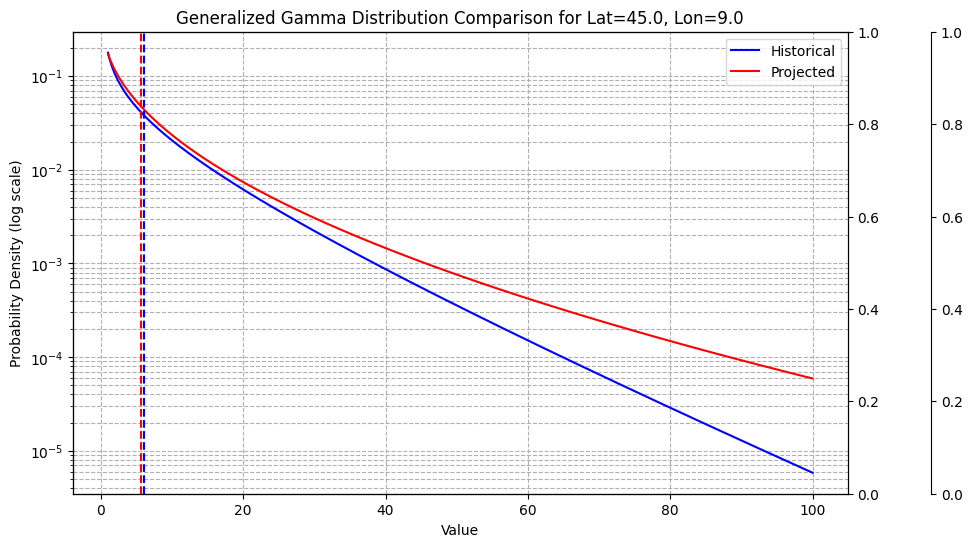

In [12]:
lat = 45.
lon =9.
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'

plot_gengamma_comparison(lat, lon, file_his, file_proj)

In [35]:
def calculate_probabilities(file_his, file_proj, X):
    # Carica i dati dai file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)

    # Inizializza una lista per memorizzare i risultati
    results = []

    # Itera attraverso tutte le coordinate presenti in file_his
    for index, row in ds_his.iterrows():
        lat = row['lat']
        lon = row['lon']

        # Trova l'elemento più vicino nella proiezione
        params_his = find_nearest(ds_his, lat, lon)
        params_proj = find_nearest(ds_proj, lat, lon)

        # Calcola la probabilità di eventi oltre X per his e proj
        P_his = 1 - gengamma.cdf(X, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
        P_proj = 1 - gengamma.cdf(X, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

        # Calcola il tempo di ritorno per his e proj
        T_his = 1 / P_his if P_his != 0 else np.inf
        T_proj = 1 / P_proj if P_proj != 0 else np.inf

        # Calcola il rapporto tra (1-Pproj(X))/(1-Phis(X))
        ratio = (1 - P_proj) / (1 - P_his) if (1 - P_his) != 0 else np.inf

        # Memorizza i risultati
        results.append({
            'lat': lat,
            'lon': lon,
            'P_his': P_his,
            'P_proj': P_proj,
            'T_his': T_his,
            'T_proj': T_proj,
            'ratio': ratio
        })

    # Converti i risultati in un DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [38]:
# Esegui il calcolo per un valore fissato X (ad esempio, X = 80)
X = 40
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'
results_df = calculate_probabilities(file_his, file_proj, X)

# Stampa i risultati
print(results_df)

         lat       lon     P_his    P_proj       T_his      T_proj     ratio
0     44.655   7.84100  0.028625  0.035148   34.933893   28.451262  0.993285
1     44.655   7.90405  0.053636  0.030313   18.644246   32.988681  1.024644
2     44.655   7.96710  0.069007  0.033794   14.491258   29.591468  1.037824
3     44.655   8.03015  0.074374  0.030381   13.445590   32.915588  1.047528
4     44.655   8.09320  0.010275  0.024921   97.321322   40.127344  0.985203
...      ...       ...       ...       ...         ...         ...       ...
2457  46.635  11.24570  0.001603  0.020959  623.928398   47.711096  0.980612
2458  46.635  11.30875  0.011525  0.018328   86.766721   54.561023  0.993118
2459  46.635  11.37180  0.023003  0.018282   43.471781   54.697673  1.004832
2460  46.635  11.43485  0.014181  0.012339   70.515409   81.044634  1.001869
2461  46.635  11.49790  0.003310  0.006760  302.087446  147.920449  0.996538

[2462 rows x 7 columns]


In [39]:
results_df.to_csv('results_pr_40.csv')